#  Question 1

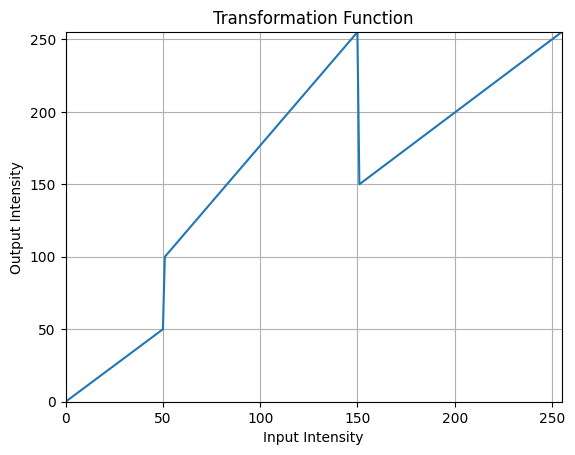

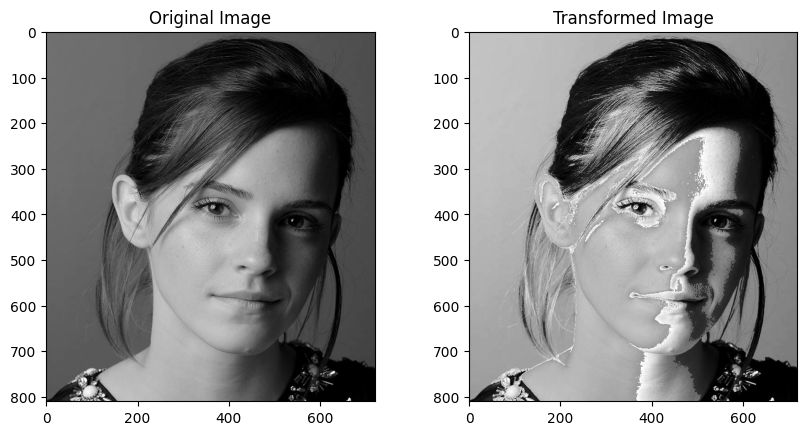

In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image

original_image_Emma = cv.imread('../emma.jpg', cv.IMREAD_GRAYSCALE)

#Define transformation function

t1 = np.linspace(0 , 50 , 51)
t2 = np.linspace(100 , 255 , 150-50)
t3 = np.linspace(150 , 255 , 255-150)
transform1 = np.concatenate((t1,t2,t3), axis=0)

#obtain transformed image

transformed_image_Emma = cv.LUT(original_image_Emma, transform1)


fig1 , ax = plt.subplots()
ax.set_title('Transformation Function')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim([0,255])
ax.set_ylim([0,255])
ax.plot(transform1)
ax.grid(True)
plt.show()

fig2 , (ax1, ax2) = plt.subplots(1,2)
fig2.set_figwidth(10)
ax1.set_title('Original Image')
ax1.imshow(original_image_Emma, cmap='gray')
ax2.set_title('Transformed Image')
ax2.imshow(transformed_image_Emma, cmap='gray')
plt.show()

#  Question 2

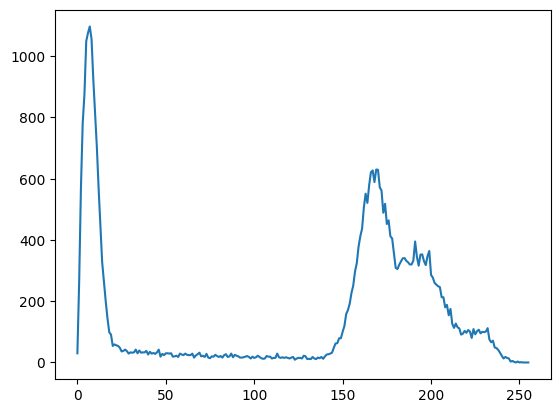

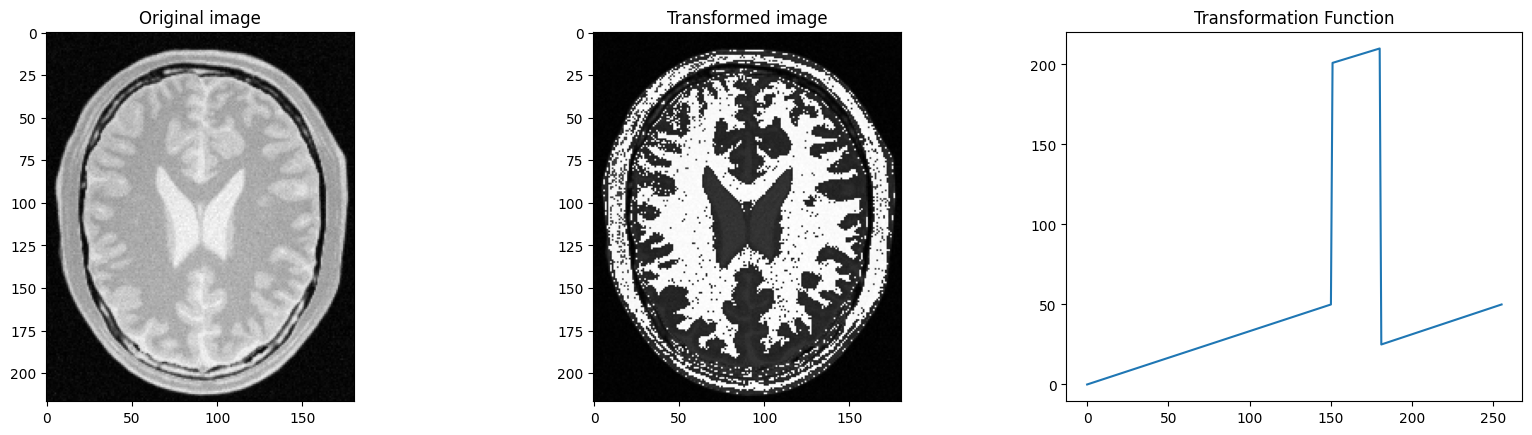

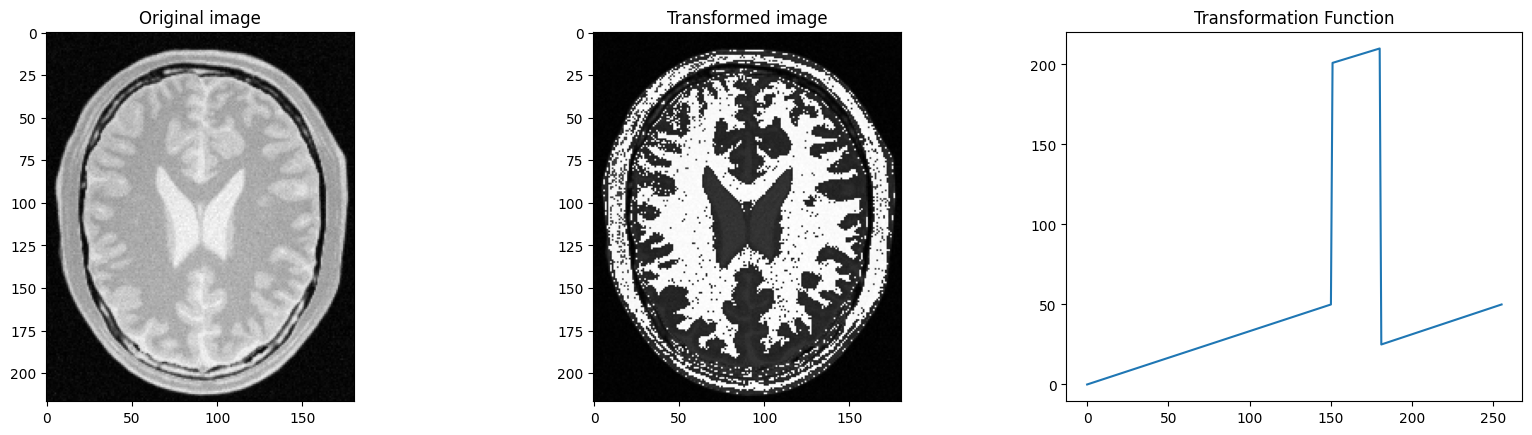

In [35]:
original_image = cv.imread('../BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)  
hist = cv.calcHist([original_image], [0], None, [256], [0, 256])
plt.plot(hist)

t1 = np.linspace(0 , 50 , 181)
t2 = np.linspace(226 , 255 , 75)
transformation = np.concatenate((t1,t2), axis=0)
transformed_image = cv.LUT(original_image, transformation)

t1 = np.linspace(0 , 50 , 151)
t2 = np.linspace(201 , 210 , 30)
t3 = np.linspace(25 , 50 ,75)
transformation = np.concatenate((t1,t2,t3), axis=0)
transformed_image = cv.LUT(original_image, transformation)

fig1 , (ax1, ax2, ax3) = plt.subplots(1,3)
fig1.set_figwidth(20)
ax1.set_title('Original image')
ax1.imshow(original_image, cmap='gray')
ax2.set_title('Transformed image')
ax2.imshow(transformed_image, cmap='gray')
ax3.set_title('Transformation Function')
ax3.plot(transformation)
plt.show()

fig2 , (ax1, ax2, ax3) = plt.subplots(1,3)
fig2.set_figwidth(20)
ax1.set_title('Original image')
ax1.imshow(original_image, cmap='gray')
ax2.set_title('Transformed image')
ax2.imshow(transformed_image, cmap='gray')
ax3.set_title('Transformation Function')
ax3.plot(transformation)
plt.show()

#  Question 3

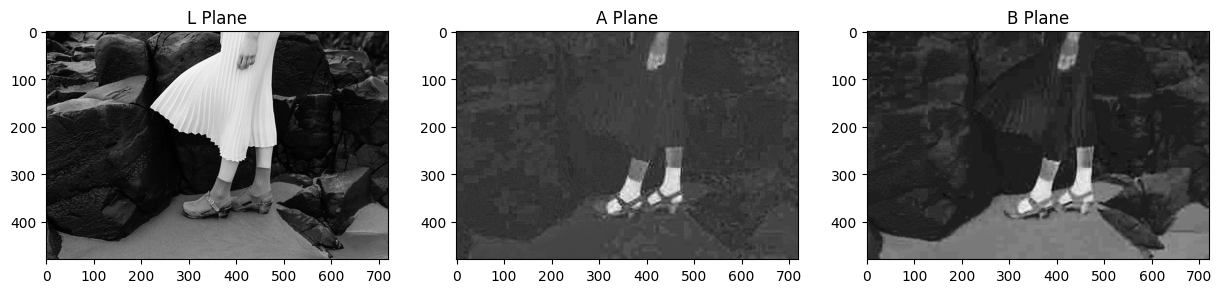

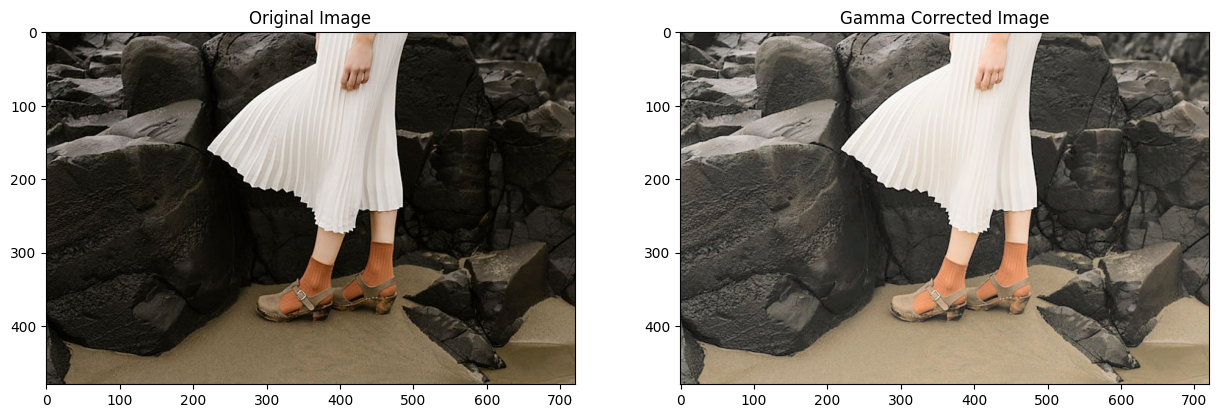

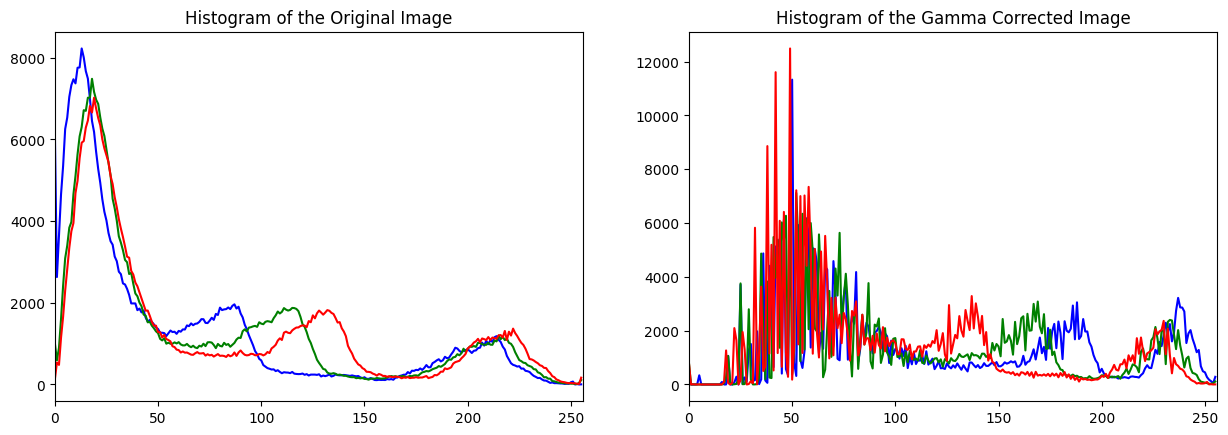

In [36]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


original_image = cv.imread('../highlights_and_shadows.jpg', cv.IMREAD_COLOR)

#convert to LAB color space
LAB_image= cv.cvtColor(original_image, cv.COLOR_BGR2LAB)
L_plane, A_plane, B_plane = cv.split(LAB_image)
#Define Gamma Transformation
gamma = 0.5
gamma_transform = np.array([((i/255)**gamma)*255 for i in np.arange(0,256)]).astype('uint8')
#Apply Gamma Transformation for L Plane
L_channel  = cv.LUT(L_plane,gamma_transform)
#Reconstruct the image and convert back to RGB color space
gamma_corrected_image = cv.cvtColor(cv.merge((L_channel, A_plane , B_plane)) , cv.COLOR_LAB2RGB)

fig1 , (ax1, ax2, ax3) = plt.subplots(1,3)
fig1.set_figwidth(15)
ax1.set_title('L Plane')
ax1.imshow(L_plane, cmap='gray')
ax2.set_title('A Plane')
ax2.imshow(A_plane, cmap='gray')
ax3.set_title('B Plane')
ax3.imshow(B_plane, cmap='gray')

fig2 , (ax1,ax2) = plt.subplots(1,2)
fig2.set_figwidth(15)
ax1.set_title('Original Image')
ax1.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax2.set_title('Gamma Corrected Image')
ax2.imshow(gamma_corrected_image)

#Histogram of the Original Image and Gamma Corrected Image
fig3 , (ax1,ax2) = plt.subplots(1,2)
fig3.set_figwidth(15)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([original_image],[i],None,[256],[0,256])
    ax1.plot(histr,color = col)
    ax1.set_xlim([0,256])
    
for i,col in enumerate(color):
    histr = cv.calcHist([gamma_corrected_image],[i],None,[256],[0,256])
    ax2.plot(histr,color = col)
    ax2.set_xlim([0,256])
    
ax1.set_title('Histogram of the Original Image')
ax2.set_title('Histogram of the Gamma Corrected Image')



plt.show()

#  Question 4

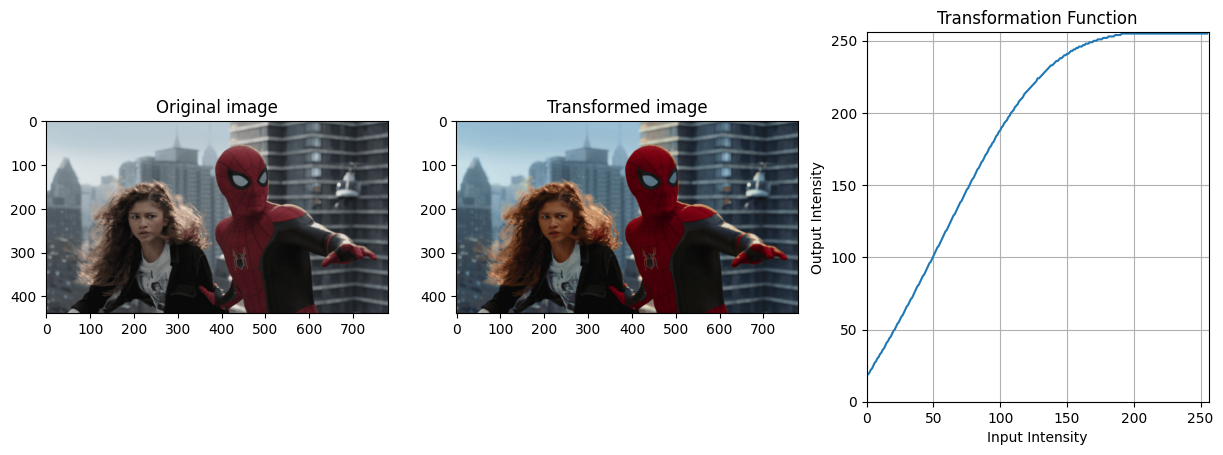

In [37]:
original_image = cv.imread('../spider.png', cv.IMREAD_COLOR)

# Convert to HSV color space and split the image into separate HSV planes
hue_plane , saturation_plane, value_plane = cv.split(cv.cvtColor(original_image, cv.COLOR_BGR2HSV))
#define transformation function
def f_x(x , a ):
    z=70
    y = int(x + (128*a)*(np.exp(-(((x-128)**2)/(2*(z**2))))))
    return (min(y,255))
# Apply transformation to the saturation plane 
a=0.75
saturation_plane = np.vectorize(f_x)(saturation_plane,a).astype(np.uint8)
# Recombine 3 planes 
vibrant_hsv_image = cv.merge([hue_plane, saturation_plane, value_plane])
# Convert back to RGB color space for displaying the image
vibrant_bgr_image = cv.cvtColor(vibrant_hsv_image, cv.COLOR_HSV2RGB)

x = np.arange(0,256)
y = np.vectorize(f_x)(x,a)

fig1 , (ax1, ax2, ax3) = plt.subplots(1,3)
fig1.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax2.set_title('Transformed image')
ax2.imshow(vibrant_bgr_image)
ax3.set_title('Transformation Function')
ax3.set_xlabel('Input Intensity')
ax3.set_ylabel('Output Intensity')
ax3.set_xlim([0,256])
ax3.set_ylim([0,256])
ax3.plot(x,y)
ax3.grid(True)


plt.show()




#  Question 5

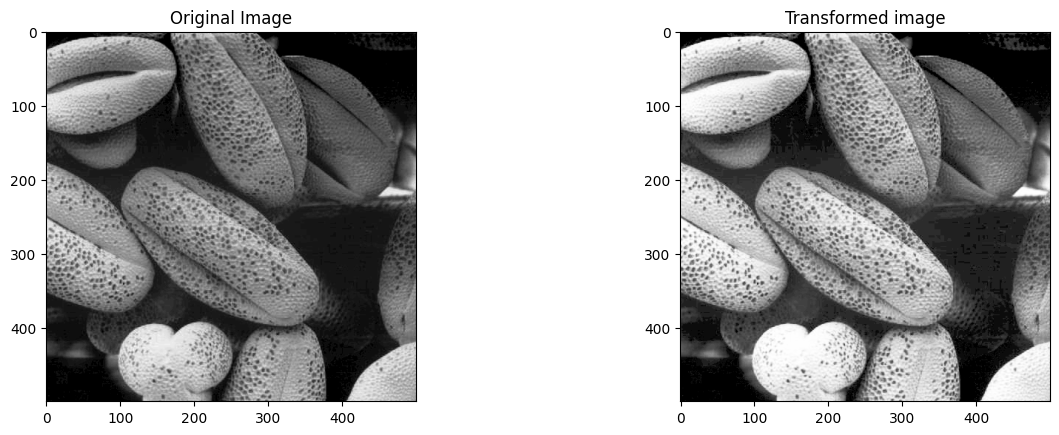

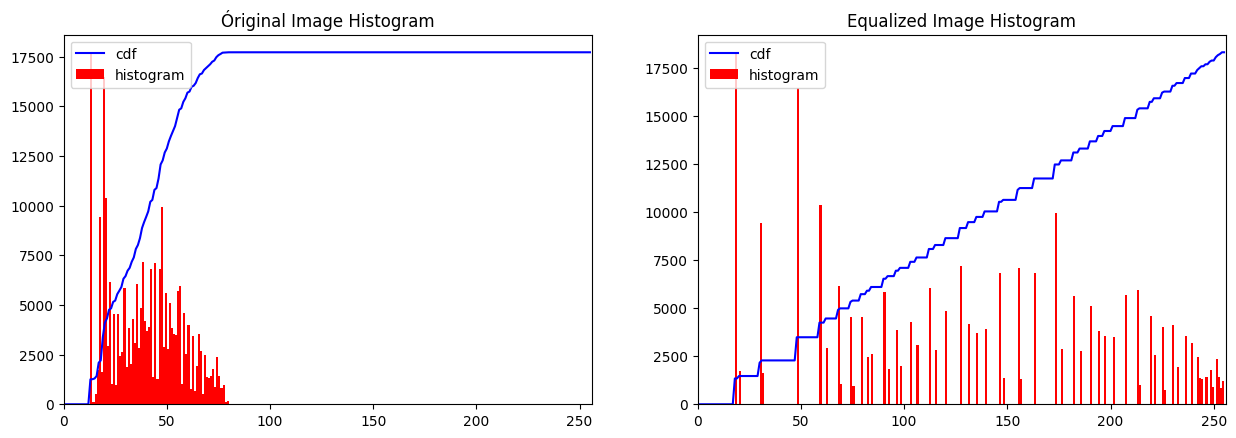

In [38]:
def Histogram_Equalizer(image):
    hist  = np.histogram(image.ravel(),256,[0,256])[0]
    M,N = image.shape
    Transformation = (255*((hist.cumsum())/(M*N))).astype(np.uint8)
    return cv.LUT(image, Transformation)
    
original_image = cv.imread('../shells.tif', cv.IMREAD_GRAYSCALE)    

equalized_image = Histogram_Equalizer(original_image)

fig1 , (ax1, ax2) = plt.subplots(1,2)
fig1.set_figwidth(15)
ax1.set_title('Original Image')
ax1.imshow(original_image, cmap='gray')
ax2.set_title('Transformed image')
ax2.imshow(equalized_image, cmap='gray')
plt.show()


hist_original  = np.histogram(original_image.ravel(), 256, [0, 256])[0]
cdf_original = hist_original.cumsum()
normalized_cdf_original = cdf_original * hist_original.max()/ cdf_original.max()

hist_equalized = np.histogram(equalized_image.ravel(), 256, [0, 256])[0]
cdf_equalized = hist_equalized.cumsum()
normalized_cdf_equalized = cdf_equalized * hist_equalized.max()/ cdf_equalized.max()

fig2 , (ax1, ax2) = plt.subplots(1,2)
fig2.set_figwidth(15)
ax1.set_title('Óriginal Image Histogram')
ax1.plot(normalized_cdf_original, color = 'b')
ax1.hist(original_image.flatten(), 256, [0, 256], color = 'r')
ax1.set_xlim([0,256])
ax1.legend(('cdf','histogram'), loc = 'upper left')

ax2.set_title('Equalized Image Histogram')
ax2.plot(normalized_cdf_equalized, color = 'b')
ax2.hist(equalized_image.flatten(), 256, [0, 256], color = 'r')
ax2.set_xlim([0,256])
ax2.legend(('cdf','histogram'), loc = 'upper left')
plt.show()




#  Qiestion 6

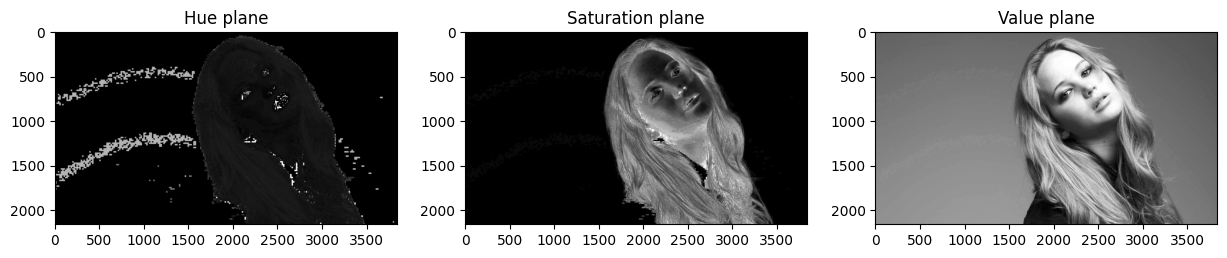

In [39]:
original_image = cv.imread('../jeniffer.jpg')
hue_plane , saturation_plane , value_plane = cv.split(cv.cvtColor(original_image , cv.COLOR_BGR2HSV))
fig1 , (ax1, ax2, ax3) = plt.subplots(1,3)
fig1.set_figwidth(15)
ax1.set_title('Hue plane')
ax1.imshow(hue_plane, cmap='gray')
ax2.set_title('Saturation plane')
ax2.imshow(saturation_plane, cmap='gray')
ax3.set_title('Value plane')
ax3.imshow(value_plane, cmap='gray')
plt.show()



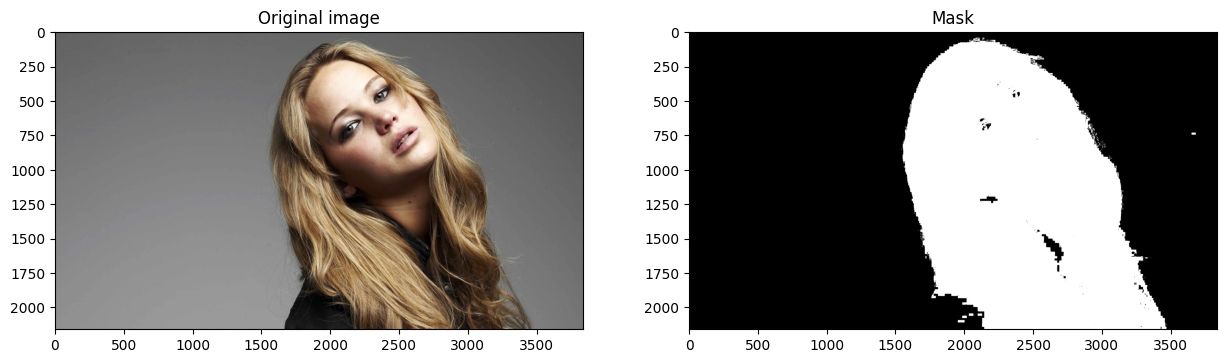

In [40]:
#Obtaining the foreground mask
#thresholding the saturation plane and obtaining the foreground mask
foreground_mask = cv.threshold(saturation_plane, 11, 255, cv.THRESH_BINARY)[1]
fig2 , (ax1, ax2) = plt.subplots(1,2)
fig2.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax2.set_title('Mask')
ax2.imshow(foreground_mask, cmap='gray' )
plt.show()


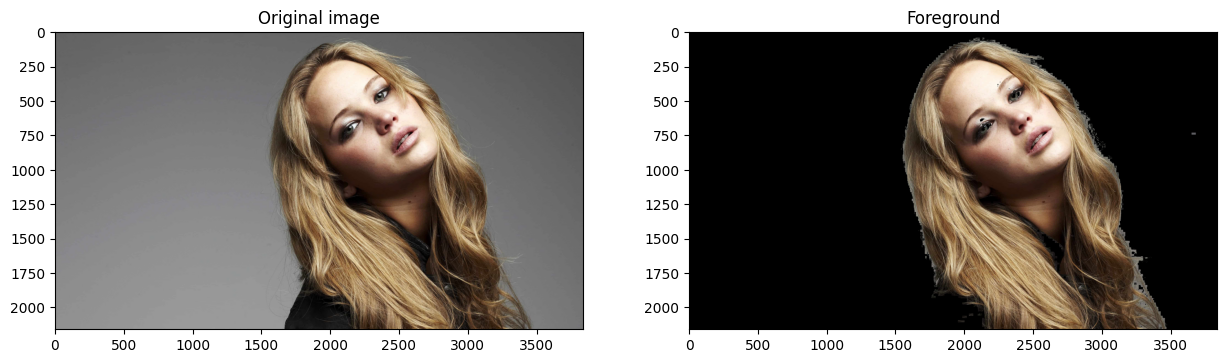

In [41]:
foreground = cv.bitwise_and(original_image, original_image, mask=foreground_mask)
fig3 , (ax1, ax2) = plt.subplots(1,2)  
fig3.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax2.set_title('Foreground')
ax2.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.show()

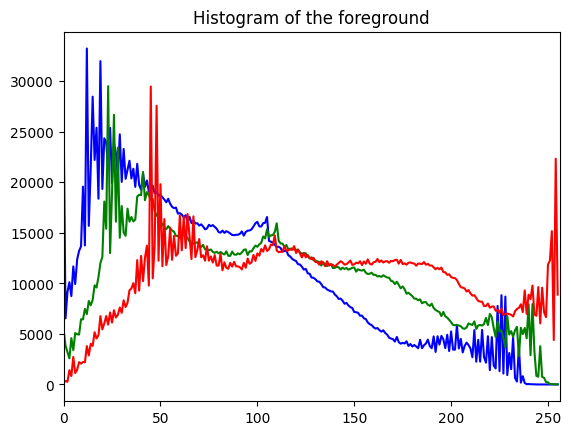

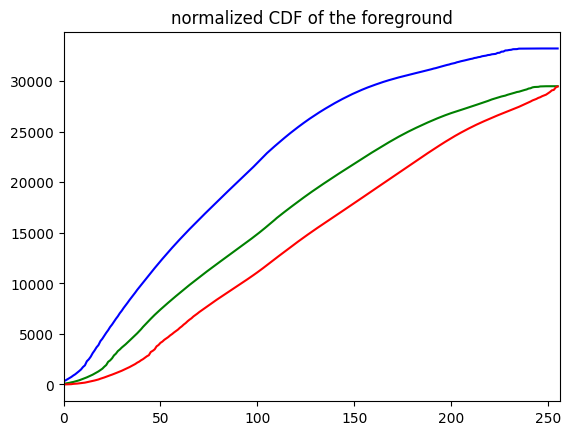

In [42]:
# compute the histogram of the foreground
color = ('b','g','r')

for i,col in enumerate(color):
    foreground_hist = cv.calcHist([original_image],[i],foreground_mask,[256],[0,256])
    plt.plot(foreground_hist,color = col)
    plt.xlim([0,256])
    
plt.title('Histogram of the foreground')
plt.show()

color = ('b','g','r')

for i,col in enumerate(color):
    foreground_hist = cv.calcHist([original_image],[i],foreground_mask,[256],[0,256])
    cdf = foreground_hist.cumsum()
    normalized_cdf = cdf * foreground_hist.max()/ cdf.max()
    plt.plot(normalized_cdf,color = col)
    plt.xlim([0,256])
    
plt.title('normalized CDF of the foreground')
plt.show()


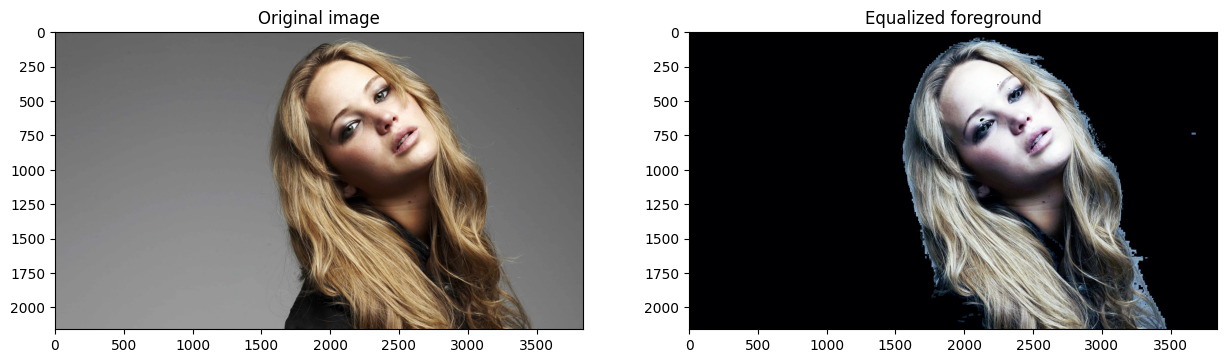

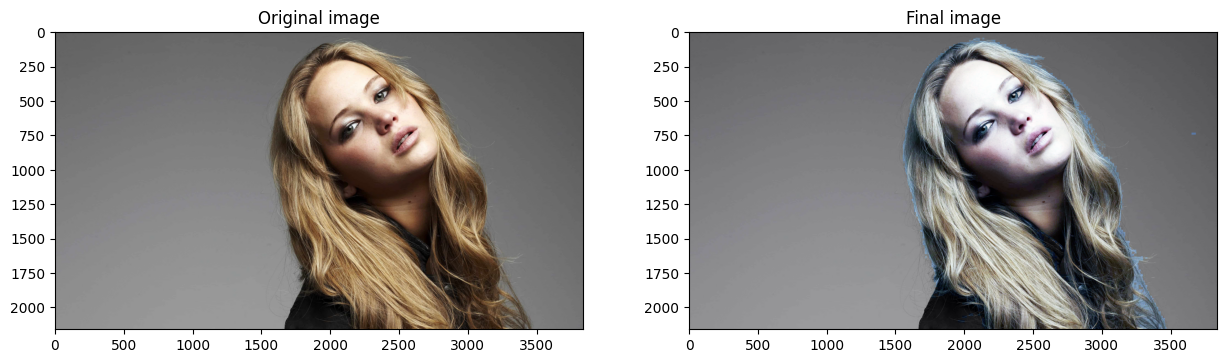

In [43]:
red , green , blue = cv.split(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))

#Define Histogram Equalizer function for each plane using Equation given in the lecture slides
def Histogram_Equalizer(image):
    hist = cv.calcHist([image], [0], foreground_mask, [256], [0, 256])
    cdf = hist.cumsum()
    Transformation = (255*((cdf)/(cdf.max()))).astype(np.uint8)
    return cv.LUT(image, Transformation)
    
#Apply Histogram Equalizer for each plane
red = Histogram_Equalizer(red)
green = Histogram_Equalizer(green)
blue = Histogram_Equalizer(blue)


equalized_foreground = cv.merge([red, green, blue])

fig5 , (ax1, ax2) = plt.subplots(1,2)
fig5.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax2.set_title('Equalized foreground')
ax2.imshow(equalized_foreground )
background  = cv.bitwise_and(original_image, original_image, mask=cv.bitwise_not(foreground_mask))

final_image = cv.add(cv.cvtColor(background, cv.COLOR_BGR2RGB), equalized_foreground)
fig6 , (ax1, ax2) = plt.subplots(1,2)
fig6.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax2.set_title('Final image')
ax2.imshow(final_image)
plt.show()  

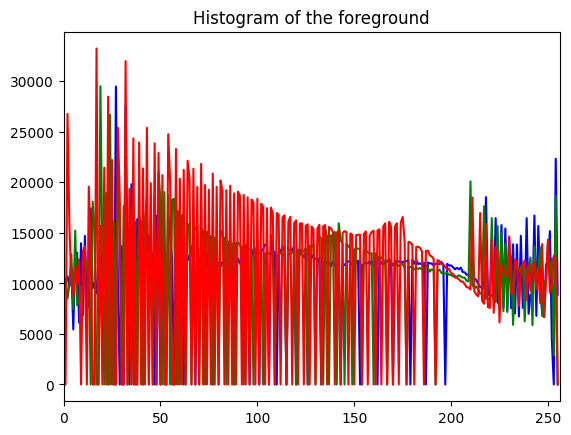

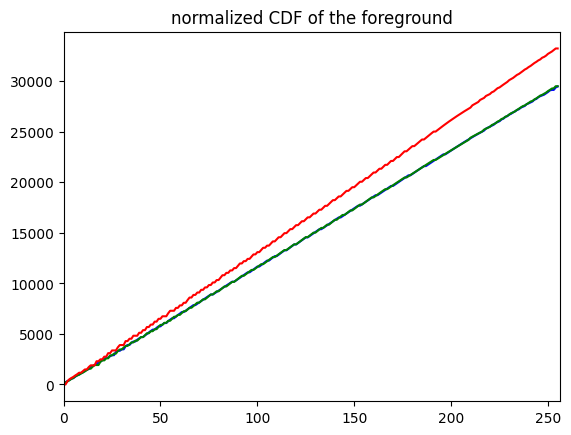

In [44]:
# compute the histogram of the foreground
color = ('b','g','r')

for i,col in enumerate(color):
    foreground_hist = cv.calcHist([final_image],[i],foreground_mask,[256],[0,256])
    plt.plot(foreground_hist,color = col)
    plt.xlim([0,256])
    
plt.title('Histogram of the foreground')
plt.show()

color = ('b','g','r')

for i,col in enumerate(color):
    foreground_hist = cv.calcHist([final_image],[i],foreground_mask,[256],[0,256])
    cdf = foreground_hist.cumsum()
    normalized_cdf = cdf * foreground_hist.max()/ cdf.max()
    plt.plot(normalized_cdf,color = col)
    plt.xlim([0,256])
    
plt.title('normalized CDF of the foreground')
plt.show()


#  Question 7


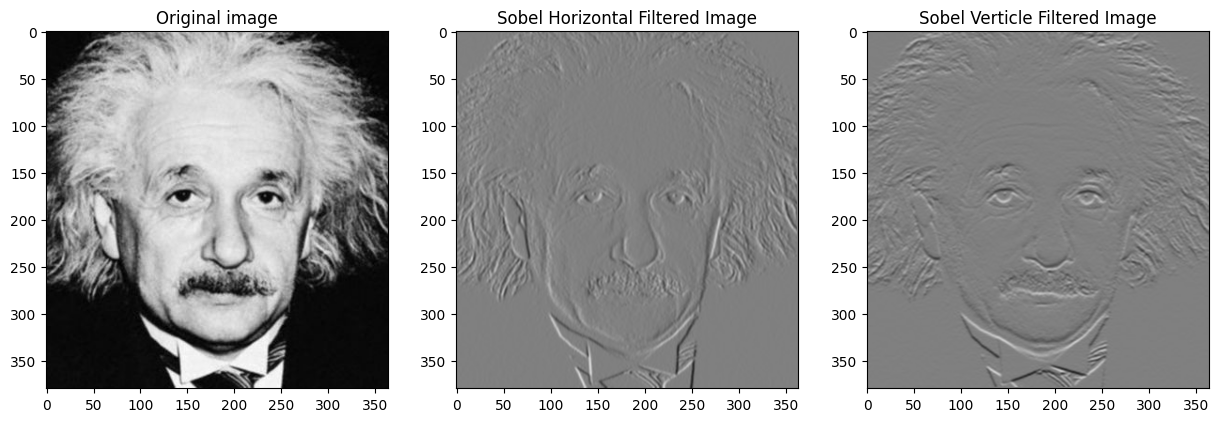

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

original_image= cv.imread('../einstein.png', cv.IMREAD_GRAYSCALE)

#Define sobel filters
sobel_horizontal_filter = np.array([(-1, 0 ,1),(-2 , 0 , 2),(-1 ,0 ,1)], dtype='float32')
sobel_vertical_filter = np.array([(-1, -2, -1),(0, 0, 0),(1, 2, 1)], dtype = 'float32')
#Apply sobel filters
sobel_horizontal_filtered_image = cv.filter2D(original_image, cv.CV_32F , sobel_horizontal_filter)
sobel_vertical_filtered_image = cv.filter2D(original_image, cv.CV_32F, sobel_vertical_filter)

fig1 , (ax1, ax2, ax3) = plt.subplots(1,3)
fig1.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(original_image, cmap='gray')
ax2.set_title('Sobel Horizontal Filtered Image')
ax2.imshow(sobel_horizontal_filtered_image, cmap='gray', vmin=-1024, vmax=1024)
ax3.set_title('Sobel Verticle Filtered Image')
ax3.imshow(sobel_vertical_filtered_image, cmap = 'gray', vmin=-1024, vmax=1024)
plt.show()



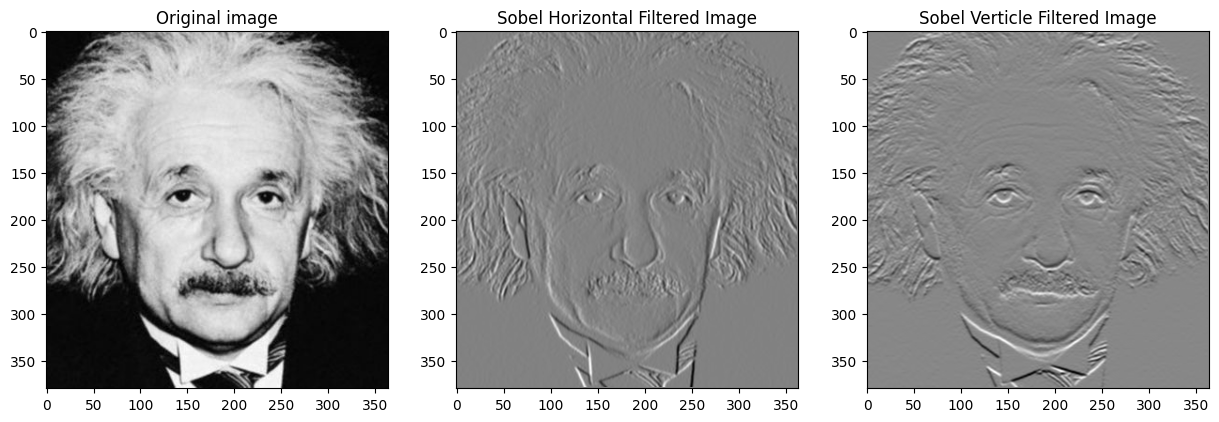

In [46]:
#Define Sobel Filters
sobel_horizontal_filter = np.array([(-1, 0 ,1),(-2 , 0 , 2),(-1 ,0 ,1)], dtype='float32')
sobel_vertical_filter = np.array([(-1, -2, -1),(0, 0, 0),(1, 2, 1)], dtype = 'float32')
#Apply Sobel Filters
(height , width) = original_image.shape
sobel_vertical_filtered_image = np.zeros(original_image.shape, np.float32)
sobel_horizontal_filtered_image = np.zeros(original_image.shape, np.float32)
for j in range(1, width - 1):
    for i in range(1, height - 1):
        sobel_horizontal_filtered_image[i, j] = np.sum(original_image[i - 1:i + 2, j - 1:j + 2] * sobel_horizontal_filter) 
for j in range(1, width - 1):
    for i in range(1, height - 1):
        sobel_vertical_filtered_image[i, j] = np.sum(original_image[i - 1:i + 2, j - 1:j + 2] * sobel_vertical_filter)

fig1 , (ax1, ax2, ax3) = plt.subplots(1,3)
fig1.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(original_image, cmap='gray')
ax2.set_title('Sobel Horizontal Filtered Image')
ax2.imshow(sobel_horizontal_filtered_image, cmap='gray')
ax3.set_title('Sobel Verticle Filtered Image')
ax3.imshow(sobel_vertical_filtered_image, cmap = 'gray' )
plt.show()



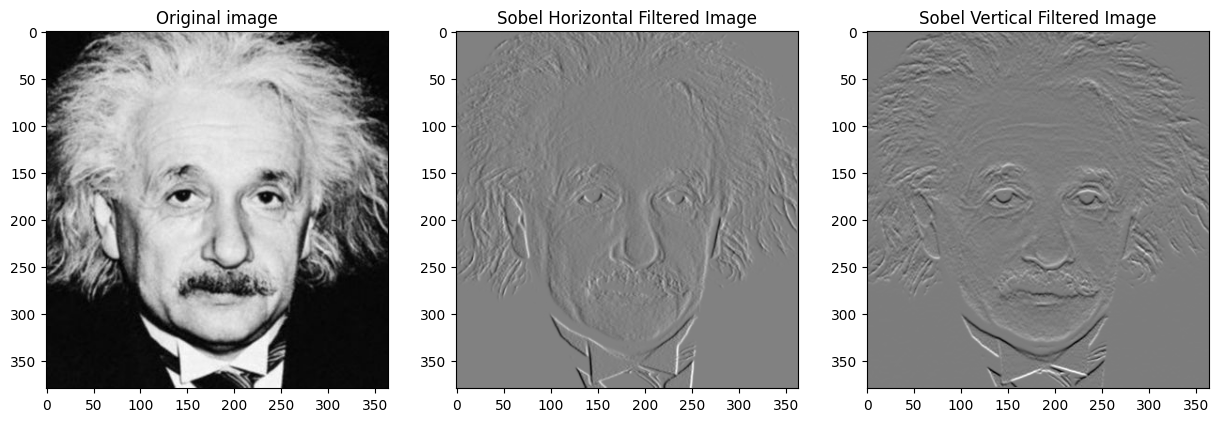

In [47]:


import cv2 as cv
import numpy as np

original_image = cv.imread('../einstein.png', cv.IMREAD_GRAYSCALE)

# Apply the horizontal Sobel filter
sobel_horizontal_row = np.array([[1, 0, -1]] , dtype='float32')
sobel_horizontal_column = np.array([[1], [2], [1]] , dtype='float32')
sobel_horizontal_filtered_image =  cv.filter2D(original_image, cv.CV_32F, sobel_horizontal_column)*cv.filter2D(original_image, cv.CV_32F, sobel_horizontal_row)
# Apply the vertical Sobel filter
sobel_vertical_row = np.array([[1, 2, 1]] , dtype='float32')
sobel_vertical_column = np.array([[1], [0], [-1]] , dtype='float32')
sobel_vertical_filtered_image = cv.filter2D(original_image, cv.CV_32F, sobel_vertical_row)*cv.filter2D(original_image, cv.CV_32F, sobel_vertical_column)


# Display or save the filtered images
fig1 , (ax1, ax2, ax3) = plt.subplots(1,3)
fig1.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(original_image, cmap='gray')
ax2.set_title('Sobel Horizontal Filtered Image')
ax2.imshow(sobel_horizontal_filtered_image, cmap='gray')
ax3.set_title('Sobel Vertical Filtered Image')
ax3.imshow(sobel_vertical_filtered_image, cmap = 'gray')
plt.show()



# Question 8

Method 1: Pixel replication:
Introduction:
It is also known as Nearest neighbor interpolation. As its name suggest, in this method, we just replicate the neighboring pixels. As we have already discussed in the tutorial of Sampling, that zooming is nothing but increase amount of sample or pixels. This algorithm works on the same principle.

Working:
In this method we create new pixels form the already given pixels. Each pixel is replicated in this method n times row wise and column wise and you got a zoomed image. Its as simple as that.

For example:
if you have an image of 2 rows and 2 columns and you want to zoom it twice or 2 times using pixel replication, here how it can be done.

For a better understanding, the image has been taken in the form of matrix with the pixel values of the image.

[[1	2]  
[3	4]]

The above image has two rows and two columns, we will first zoom it row wise.

Row wise zooming:
When we zoom it row wise, we will just simple copy the rows pixels to its adjacent new cell.

Here how it would be done.

[[1	 1	2	2]
[3	3	4	4]]

As you can that in the above matrix, each pixel is replicated twice in the rows.

Column size zooming:
The next step is to replicate each of the pixel column wise, that we will simply copy the column pixel to its adjacent new column or simply below it.

Here how it would be done.

[[1	1	2	2]
[1	1	2	2]
[3	3	4	4]
[3	3	4	4]]
New image size:
As it can be seen from the above example, that an original image of 2 rows and 2 columns has been converted into 4 rows and 4 columns after zooming. That means the new image has a dimensions of

(Original image rows * zooming factor, Original Image cols * zooming factor)

Advantage and disadvantage:
One of the advantage of this zooming technique is, it is very simple. You just have to copy the pixels and nothing else.

The disadvantage of this technique is that image got zoomed but the output is very blurry. And as the zooming factor increased, the image got more and more blurred. That would eventually result in fully blurred image.

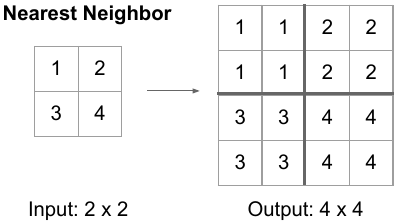

In [48]:
def nearest_neighbor_zoom(original_image , factor):
    (height,width)   = original_image.shape[:2]
    (new_height,new_width) = (int(height*factor) , int(width*factor))
    zoomed_image = np.zeros((new_height,new_width,3)).astype(np.uint8)
    for i in range(new_height):
        for j in range(new_width):
            zoomed_image[i,j] = original_image[i//factor, j//factor]
    return zoomed_image

import cv2 as cv    
import numpy as np
import matplotlib.pyplot as plt

original_image = cv.cvtColor(cv.imread('../zooming/im01small.png',cv.IMREAD_COLOR ), cv.COLOR_BGR2RGB)
zoomed_image = nearest_neighbor_zoom(original_image , 4)


cv.namedWindow('Original image', cv.WINDOW_AUTOSIZE)
cv.imshow('Original image', cv.cvtColor(original_image , cv.COLOR_RGB2BGR))
cv.namedWindow('Zoomed image', cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed image', cv.cvtColor(zoomed_image , cv.COLOR_RGB2BGR))    
cv.waitKey(0)
cv.destroyAllWindows()


https://en.wikipedia.org/wiki/Bilinear_interpolation#:~:text=In%20computer%20vision%20and%20image%20processing%2C%20bilinear%20interpolation%20is%20used,color%2C%20transparency%2C%20etc.

In [50]:
def bilinear_interpolation_zoom(original_image, factor):
    (height,width)   = original_image.shape[:2]
    (new_height,new_width) = (int(height*factor) , int(width*factor))
    zoomed_image = np.zeros((new_height,new_width,3)).astype(np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            (x1 , y1)  = ( i//factor ,  j//factor)
            (x2 , y2) =  (min(x1 + 1, height - 1) , min(y1 + 1, width - 1))
            dx = i/factor - x1
            dy = j/factor - y1
            zoomed_image[i,j] = (1 - dx) * (1 - dy) * original_image[x1, y1] + dx * (1 - dy) * original_image[x2, y1] + (1 - dx) * dy * original_image[x1, y2] + dx * dy * original_image[x2, y2]
            
    return zoomed_image

In [51]:
import cv2 as cv    
import numpy as np
import matplotlib.pyplot as plt

original_image = cv.cvtColor(cv.imread('../zooming/im01small.png',cv.IMREAD_COLOR ), cv.COLOR_BGR2RGB)
zoomed_image = bilinear_interpolation_zoom(original_image , 4)

cv.namedWindow('Original image', cv.WINDOW_AUTOSIZE)
cv.imshow('Original image', cv.cvtColor(original_image , cv.COLOR_RGB2BGR))
cv.namedWindow('Zoomed image', cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed image', cv.cvtColor(zoomed_image , cv.COLOR_RGB2BGR))    
cv.waitKey(0)
cv.destroyAllWindows()




In [52]:
def normalized_ssd(image1, image2):
    diff = image1 - image2
    ssd = np.sum(diff ** 2)
    normalized_ssd = ssd / (image1.shape[0] * image1.shape[1] * image1.shape[2])
    return normalized_ssd

for i in range(1 , 3):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = nearest_neighbor_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))

for i in range(4 , 8):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = nearest_neighbor_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))

for i in range(9 , 10):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = nearest_neighbor_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))


    
    

Normalized SSD for image 1 is 31.284316486625514
Normalized SSD for image 2 is 11.902013310185184
Normalized SSD for image 4 is 78.73781724215534
Normalized SSD for image 5 is 50.57724609375
Normalized SSD for image 6 is 30.553995949074075
Normalized SSD for image 7 is 27.964142659505207
Normalized SSD for image 9 is 21.148100694444445


In [53]:
for i in range(1 , 3):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = bilinear_interpolation_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))

for i in range(4 , 8):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = bilinear_interpolation_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))

for i in range(9 , 10):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = bilinear_interpolation_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))


Normalized SSD for image 1 is 39.257033179012346
Normalized SSD for image 2 is 16.21177662037037
Normalized SSD for image 4 is 81.65874063625257
Normalized SSD for image 5 is 53.70764858217593
Normalized SSD for image 6 is 35.51769129372428
Normalized SSD for image 7 is 30.22005997721354
Normalized SSD for image 9 is 26.669085590277778


# Question 9

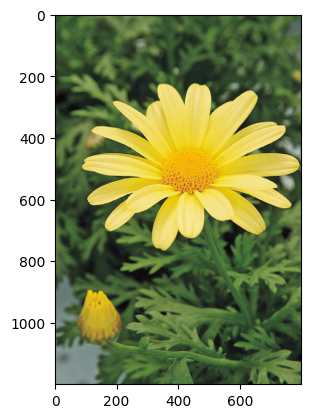

In [54]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('../flower.jpeg', cv.IMREAD_COLOR)   
plt.imshow(cv.cvtColor(image , cv.COLOR_BGR2RGB))
plt.show()



In [55]:
#cv.selectROI(image)
rect = (70, 178, 730, 619)  #rectangle was defined by above cv.selectROI(image) function & using the mouse callback function
mask = np.zeros(image.shape[:2], dtype = "uint8")
fgdModel = np.zeros((1, 65), dtype = "float")
bgdModel = np.zeros((1, 65), dtype = "float")

(mask , bgdModel , fgdModel) =  cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5 , cv.GC_INIT_WITH_RECT)


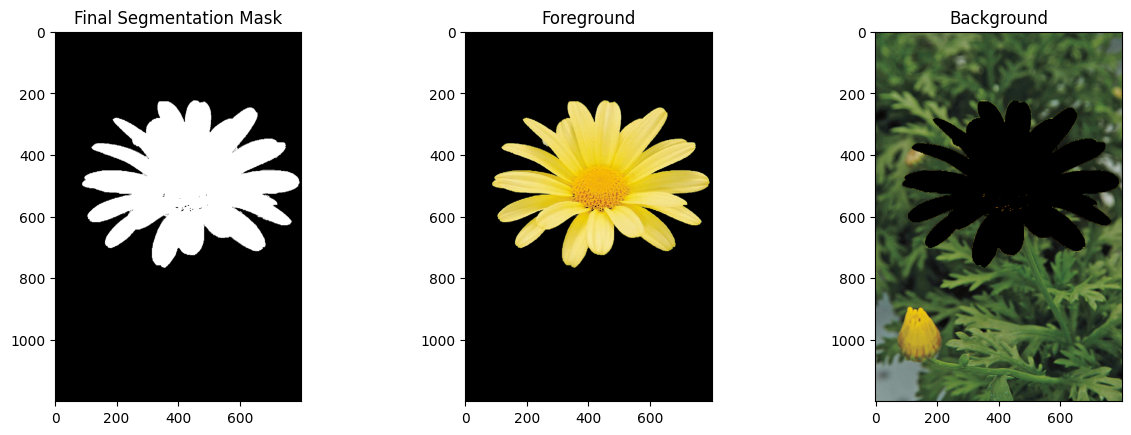

In [56]:
new_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
cv.grabCut(image, new_mask, None, bgdModel, fgdModel, 5 , cv.GC_INIT_WITH_MASK)
foreground = cv.bitwise_and(image, image, mask = new_mask)
background = image - foreground

fig1 , (ax1,ax2,ax3) = plt.subplots(1,3)
fig1.set_figwidth(15)
ax1.set_title('Final Segmentation Mask')
ax1.imshow(new_mask, cmap='gray')
ax2.set_title('Foreground')
ax2.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax3.set_title('Background')
ax3.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.show()


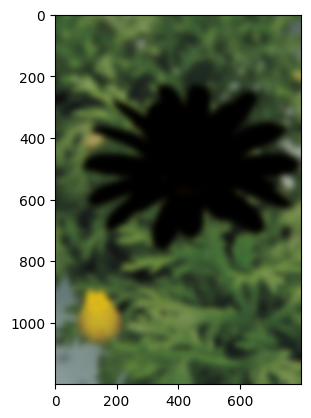

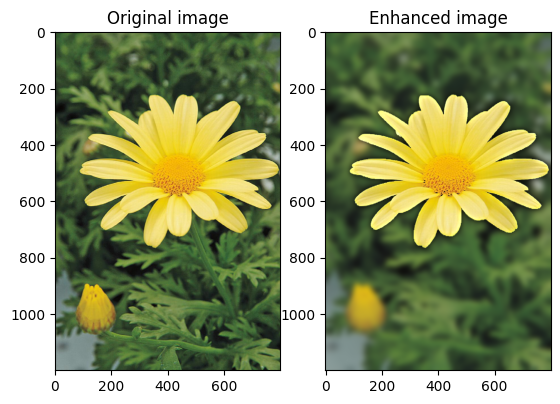

In [57]:

blurred_background = cv.GaussianBlur(background, (0, 0), 10)
plt.imshow(cv.cvtColor(blurred_background, cv.COLOR_BGR2RGB))
enhanced_image = cv.add(blurred_background, foreground)

# Display the original and enhanced images
fig2 , (ax1,ax2) = plt.subplots(1,2)
#fig2.set_figwidth(8)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax2.set_title('Enhanced image')
ax2.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.show()
